# ANN Homework 4
## Question 1
Build a U-net like predictor for the stock market data. 
- You may want to truncate the training and test input lengths to factors of 4 to avoid complication from downsampling and upsampling. 
- Use the following structure.
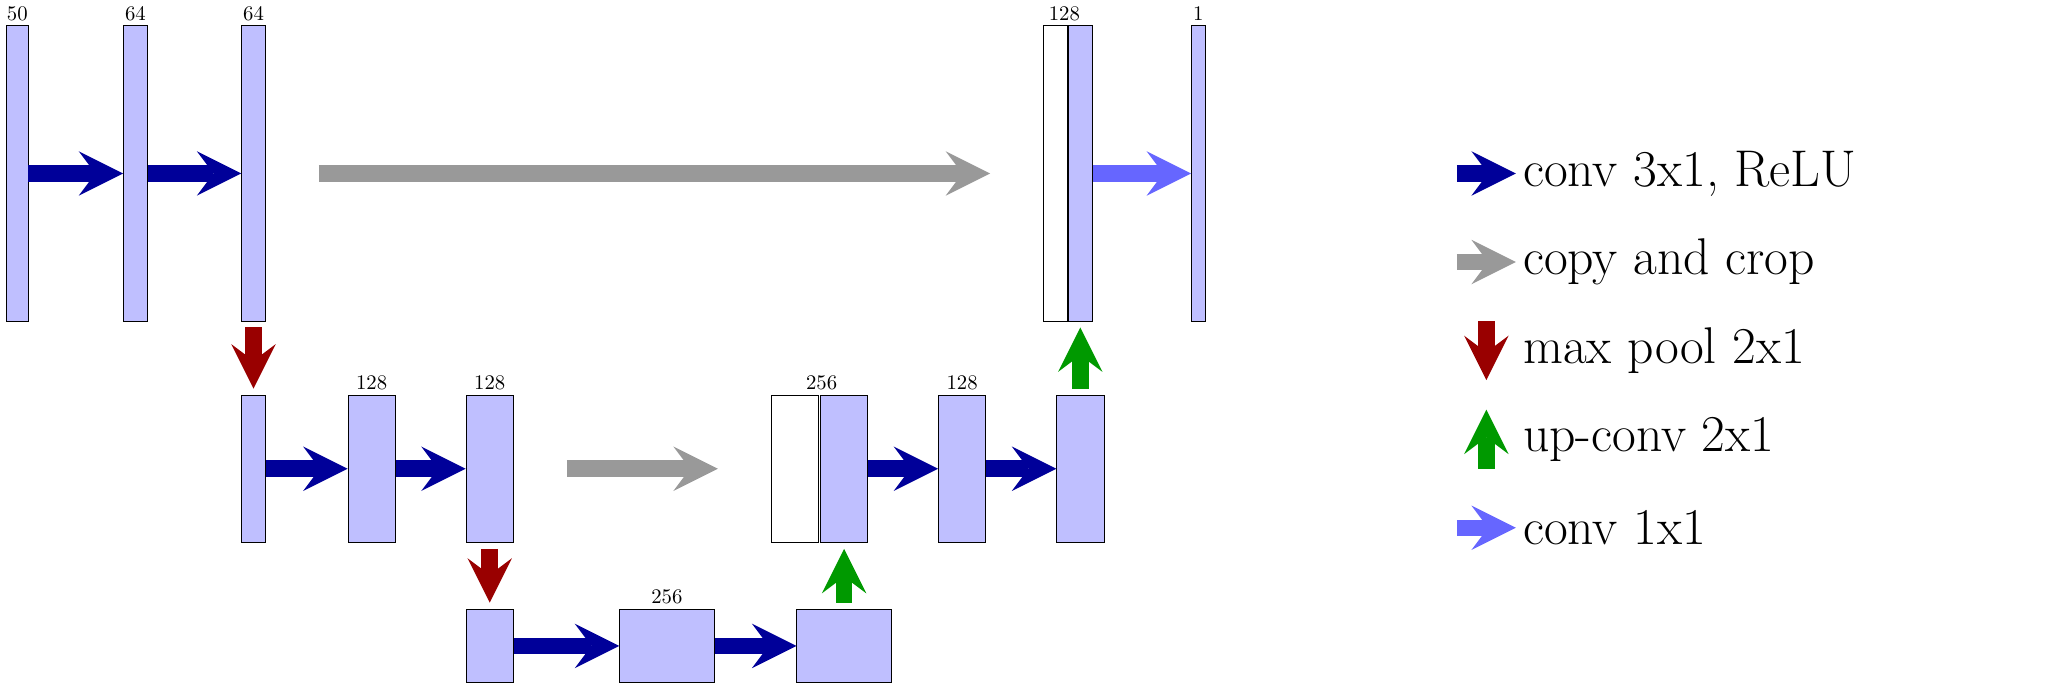


In [1]:
#import and setup training set
import yfinance as yf
import pandas as pd
import numpy as np

def get_price(tick,start='2020-10-01',end=None):
    return yf.Ticker(tick).history(start=start,end=end)['Close']

def get_prices(tickers,start='2020-10-01',end=None):
    df=pd.DataFrame()
    for s in tickers:
        df[s]=get_price(s,start,end)
    return df

feature_stocks=['tsla','fb','twtr','amzn','nflx','gbtc','gdx','intc','dal','c']
predict_stock='msft'

# training set
start_date_train='2020-10-01'
end_date_train='2020-12-31'

X_train=get_prices(feature_stocks,start=start_date_train,end=end_date_train)
y_train=get_prices([predict_stock],start=start_date_train,end=end_date_train)

# testing set
start_date_test='2021-01-01' # end date omit, default is today
X_test=get_prices(feature_stocks,start=start_date_test)
y_test=get_prices([predict_stock],start=start_date_test)

X_train=np.array(X_train)
Y_train=np.array(y_train)
X_test=np.array(X_test)
Y_test=np.array(y_test)

In [2]:
#truncate the training and test input lengths to factors of 4 to avoid complication from downsampling and upsampling
X_train = X_train[0:(len(X_train)-(len(X_train)%4))]
Y_train = Y_train[0:(len(Y_train)-(len(Y_train)%4))]
X_test = X_test[0:(len(X_test)-(len(X_test)%4))]
Y_test = Y_test[0:(len(Y_test)-(len(Y_test)%4))]
print(len(X_train)%4, len(Y_train)%4, len(X_test)%4, len(Y_test)%4)

0 0 0 0


In [ ]:
import tensorflow


In [ ]:
import tensorflow as tf

sample_number = len(X_train)
input_length = len(X_train)
output_length = len(Y_train)

# inputs = tf.keras.layers.Input(sample_number, input_length, 1)

# #contraction path
# c1 = tf.keras.layers.Conv1D(50, (3,1), activation='relu')(inputs)
# #c1 = tf.keras.layers.Dropout(0.1)(c1)
# c1 = tf.keras.layers.Conv1D(64, (3,1), activation='relu')(c1)
# c1 = tf.keras.layers.Conv1D(64, (3,1), activation='relu')(c1)
# p1 = tf.keras.layers.MaxPooling1D((2, 1))(c1)

# c2 = tf.keras.layers.Conv1D(128, (3,1), activation='relu')(p1)
# c2 = tf.keras.layers.Conv1D(128, (3,1), activation='relu')(c2)
# p2 = tf.keras.layers.MaxPooling1D((2, 1))(c2)

# c3 = tf.keras.layers.Conv1D(256, (3,1), activation='relu')(p2)

# u4 = f.keras.layers.Conv1DTranspose(128, (2, 1))(c3)
# u4 = tf.keras.layers.concatenate([u4, c2])
# c4 = tf.keras.layers.Conv1D(128, (3,1), activation='relu')(p4)
# c4 = tf.keras.layers.Conv1D(128, (3,1), activation='relu')(c4)

# u5 = f.keras.layers.Conv1DTranspose(64, (2, 1))(c4)
# u5 = tf.keras.layers.concatenate([u5, c1])

# outputs = tf.keras.layers.Conv1D(1, (1,1),  activation='sigmoid')(u5)

# model = tf.keras.Model(inputs=[inputs], outputs=[outputs])
# model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# model.summary()

In [83]:
# 1: U-net

import torch
import torch.nn as nn

x_train = torch.from_numpy(X_train).type(torch.Tensor)
x_test = torch.from_numpy(X_test).type(torch.Tensor)
y_train = torch.from_numpy(Y_train).type(torch.Tensor)
y_test = torch.from_numpy(Y_test).type(torch.Tensor)

N, D_in, H, D_out = 64, len(X_train[0]), 20, len(Y_train[0])
device = torch.device('cpu')

#x = torch.randn(N, D_in, device=device)
#y = torch.randn(N, D_out, device=device)


model = torch.nn.Sequential(
            torch.nn.Linear(D_in, H),
            torch.nn.ReLU(),
            torch.nn.Linear(H, H),
            torch.nn.ReLU(),
            torch.nn.Linear(H, H),
            torch.nn.ReLU(),
            torch.nn.Linear(H, H),
            torch.nn.ReLU(),
            torch.nn.Linear(H, H),
            torch.nn.ReLU(),
            torch.nn.Linear(H, H),
            torch.nn.ReLU(),
            torch.nn.Linear(H, D_out),).to(device)

loss_fn = torch.nn.MSELoss(reduction='mean')

learning_rate = 5e-8

lossEpoch = []

for t in range(500):
    y_pred = model(x_train)
    loss = loss_fn(y_pred, y_train)
    
    lossEpoch.append([t, loss.item()])
    #print(t, loss.item())
    
    model.zero_grad()
    
    loss.backward()
    
    with torch.no_grad():
        for param in model.parameters():
            param.data -= learning_rate * param.grad

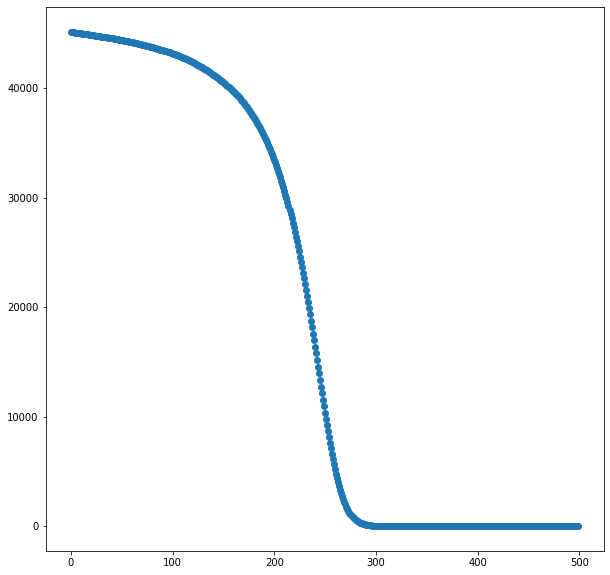

In [92]:
#2: Plot the the estimated price along with the ground truth for both training and test data in two separate plots. 
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(10,10))
loss_epoch_array = np.array(lossEpoch)
#print(loss_epoch_array[:,0])
x_epoch = loss_epoch_array[:,0]
y_loss = loss_epoch_array[:,1]
plt.scatter(x_epoch,y_loss)